In [1]:
import pickle# для манипуляц со словариком пикл
import numpy as np
import pandas as pd
#from tqdm import tqdm_notebook
from scipy.sparse import csr_matrix, hstack # добавит новый столбец не разряженный к разряженной матрице
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error

#import statsmodels.formula.api as smf
#import statsmodels.tsa.api as smt
#import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize
#from simpletable import SimpleTable
#import tables
import statsmodels as st

In [53]:
pip install simpltable

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement simpltable (from versions: none)
ERROR: No matching distribution found for simpltable


In [184]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
       
        trace = go.Scatter(
            x = df.index,
           
            y = df[column],
            mode = 'lines',
            name = column # tupo nazvanie
            
        )
        
        
        data.append(trace)
        #print(data)
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

#dataset = pd.read_csv('ts_keg.csv', index_col=['Time'], parse_dates=['Time'])
#plotly_df(dataset, title = "Users online")
dataset = pd.read_csv('ik03_z.csv', index_col=['Time'], parse_dates=['Time'])
dataset2 = pd.read_csv('ik03_h.csv', index_col=['Time'], parse_dates=['Time'])
dataset3 = pd.read_csv('ik03_h_c.csv', index_col=['Time'], parse_dates=['Time'])
iat = pd.read_csv('iat1.csv', index_col=['Time'], parse_dates=['Time'])
iat2 = pd.read_csv('iat2.txt')
plotly_df(dataset3, title = "N_mm")
plotly_df(dataset2, title = "N_mm")
plotly_df(iat, title = "Z")
#plotly_df(dataset,title = "X_m")
#dataset['Online users'].head()
#def moving_average(series, n):# Скользящ среднее
#    return np.average(series[-n:])
#moving_average(dataset.Users, 24)
#dataset['nor']=(dataset['X_m']-dataset['X_m'].mean())/dataset['X_m'].std()
#dataset['nor']=(dataset['X_m']-dataset['X_m'].min())/(dataset['X_m'].max()-dataset['X_m'].min())
#sns.distplot(dataset['nor'])
#dataset.head()
#dataset['nor']=(dataset['X_m']-dataset['X_m'].min())/(dataset['X_m'].max()-dataset['X_m'].min())
#dataset1 = dataset.drop('X_m',axis=1)
#daraset = dataset.drop('nor',axis=1)

#plotly_df(dataset1, title = "N_mm")


## Tests

In [3]:
itog = dataset.describe()
#dataset.hist()
print(itog['Z_m']['std']/itog['Z_m']['mean']) 
#print('V = %f' % (itog['std']/itog['mean'])

1.8013672793561256e-08


### Тест Харке — Бера

In [15]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
#jb_test = stats.stattools.jarque_bera(dataset)
jb=st.jarque_bera(dataset)
iat=st.jarque_bera(iat1['N'])
#a = np.vstack([jb_test])
#itog = SimpleTable(a, row)
print(iat)


AttributeError: module 'statsmodels' has no attribute 'jarque_bera'

## Kolmagorov Smirnov


KstestResult(statistic=1.0, pvalue=0.0)


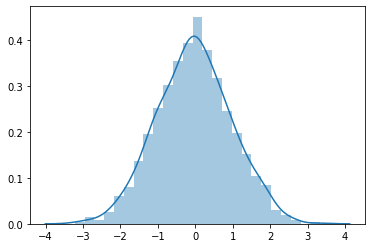

In [180]:

xx = iat2['N']
xxx =xx.to_numpy()
z =xxx.reshape(765,4)
from scipy.stats import kstest
x = np.random.normal(0,1,1000)
test_k = kstest(iat2['N'], 'norm')
print(test_k)
sns.distplot(x);
#print(z[0:20])
#iat2['z']
#print(x)
#iat['N']
#for  f in ia:
#    t.append(i)
#h.reshape((4, 25))


In [6]:
st.tsa.stattools.adfuller(dataset)
#rint 'adf: ', test[0] 
#rint 'p-value: ', test[1]
#rint'Critical values: ', test[4]
#f test[0]> test[4]['5%']: 
#   print('есть единичные корни, ряд не стационарен')
#lse:
#   print('единичных корней нет, ряд стационарен')

AttributeError: module 'statsmodels' has no attribute 'tsa'

In [7]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling Среднее трэнд")

    plt.plot(upper_bond, "r--", label="Верх доверител интервал / Нижний доверит интервал")
    plt.plot(lower_bond, "r--")
    plt.plot(dataset[n:], label="Актуальные значения")
    plt.legend(loc="upper left")
    plt.grid(True)
    

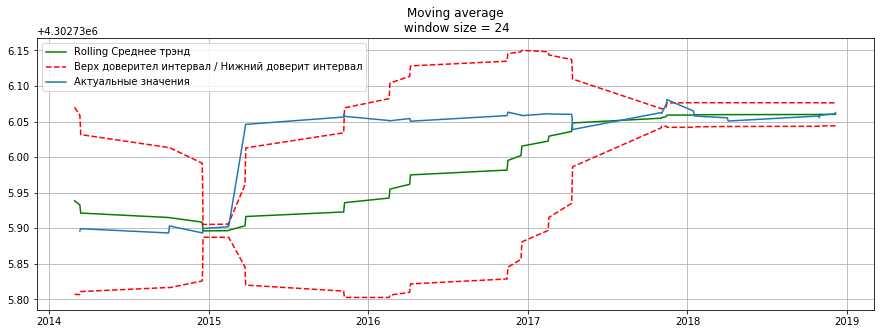

In [182]:

plotMovingAverage(dataset, 24) # сглаживаем по дням
#plotMovingAverage(dataset3, 24*7) # сглаживаем по неделям


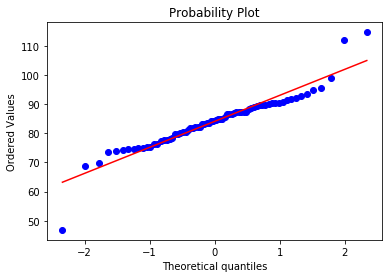

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BFB7080>]],
      dtype=object)

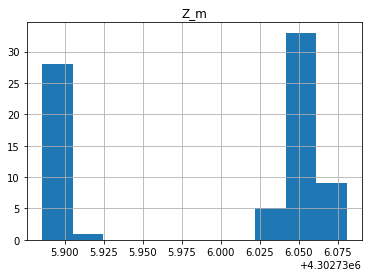

In [9]:
import numpy as np 
import pylab 
import scipy.stats as stats
measurements = np.random.normal(loc = 20, scale = 5, size=100)   

#stats.probplot(measurements, dist="norm", plot=pylab)
stats.probplot(dataset3['H_mm'], dist="norm", plot=pylab)

pylab.show()
#dataset
dataset.hist()

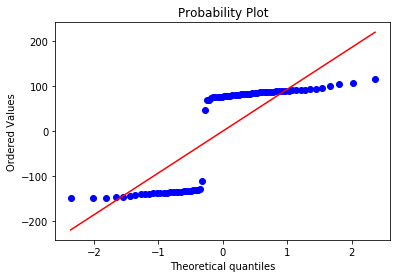

In [10]:
import numpy as np 
import pylab 
import scipy.stats as stats
measurements = np.random.normal(loc = 20, scale = 5, size=100)   

#stats.probplot(measurements, dist="norm", plot=pylab)

stats.probplot(dataset2['H_mm'], dist="norm", plot=pylab)
pylab.show()
#dataset

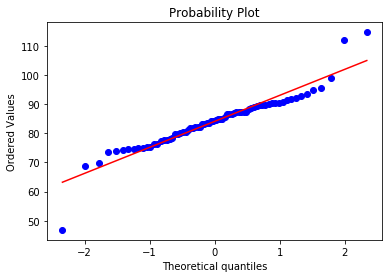

In [11]:
import numpy as np 
import pylab 
import scipy.stats as stats
measurements = np.random.normal(loc = 20, scale = 5, size=100)   

#stats.probplot(measurements, dist="norm", plot=pylab)

stats.probplot(dataset3['H_mm'], dist="norm", plot=pylab)
pylab.show()
#dataset

0.9150767922401428 0.00013001142360735685


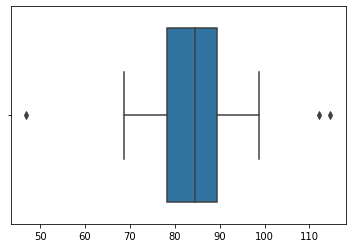

In [12]:
from scipy.stats import shapiro
dat =  dataset3['H_mm'].to_numpy()
#dat = dataset2['H_mm'].values()
#dat = dataset2.values()
#
#stat
#stat, p = stats.kstest(dat, 'norm')
stat, p = shapiro(dat)

print(stat , p)
sns.boxplot(dat)

Mark     Date    X_m      Y_m    Z_m
IK02 09.04.2012 1234777  7371  4533184  47208  4301507  23385
     10.04.2012 1234777  7316  4533184  47127  4301507  23411
     11.04.2012 1234777  7484  4533184  47360  4301507  23505
     04.10.2012 1234777  5909  4533184  48049  4301507  24096
     05.10.2012 1234777  5962  4533184  47678  4301507  23840

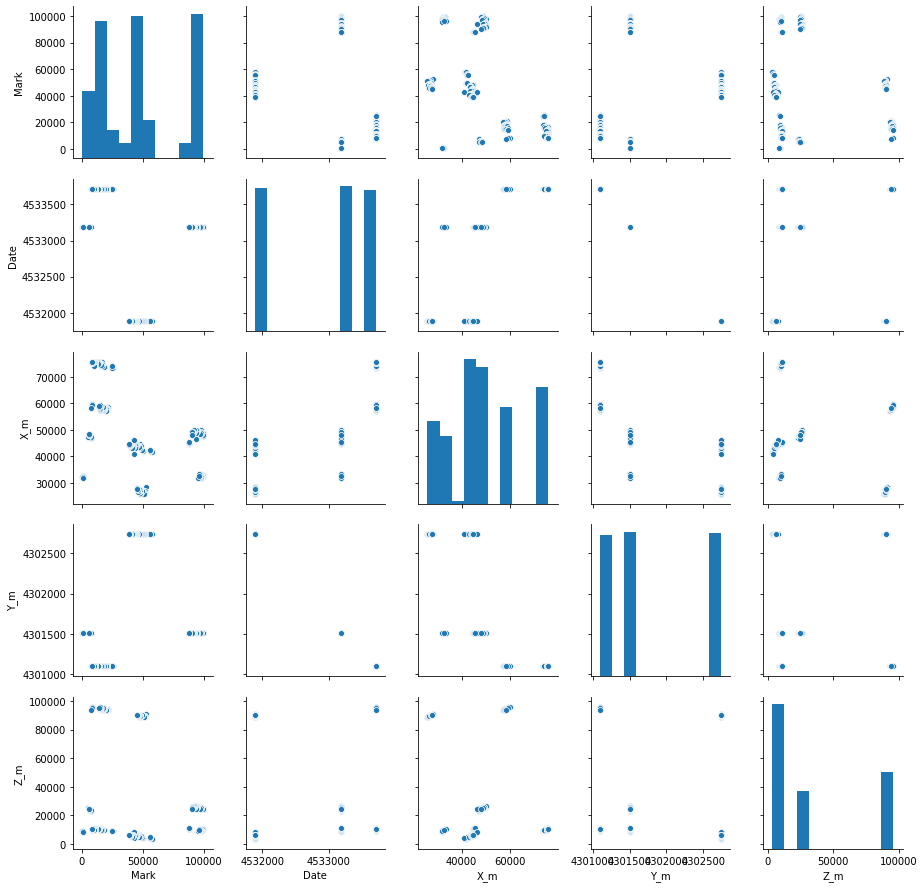

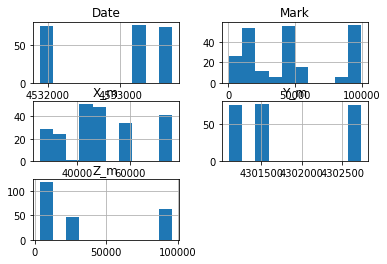

In [13]:

#dat = pd.read_csv('ik03.csv', index_col=['time'], parse_dates=['time'],sep=';')
#df = pd.read_csv('ik03.csv',sep=';')
df = pd.read_csv('all.csv')
df.head(5)

#sns.boxplot(df['X_m'])
#sns.boxplot(df['Z_m'])
sns.pairplot(df)
df.hist()
#df['x']
df.head(5)

In [14]:
d = pd.read_csv("telecom_churn.csv")
d.head()
#d.hist();


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


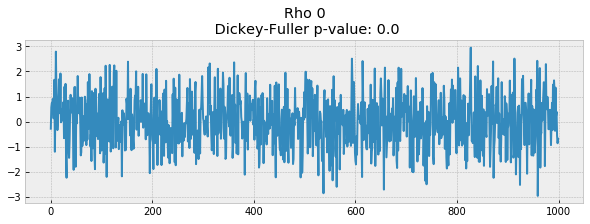

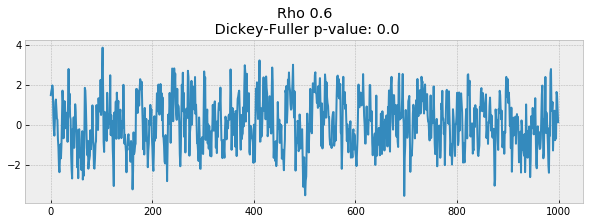

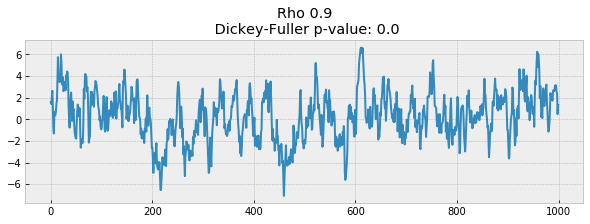

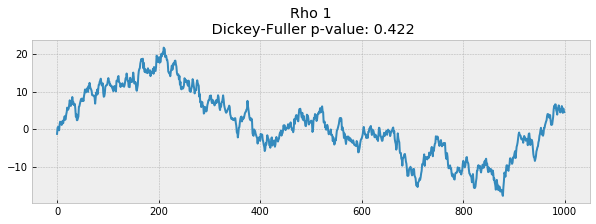

In [269]:
import statsmodels.api as sm
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size = n_samples) # x и w массивы с норм распред одинаковые
    for t in range(n_samples):# range генерирует числа от 0 до 1000 0 1 2 3 4 5 6 7 8 i.t.d. Это цикл
        x[t] = rho * x[t-1] + w[t] #t-1 
        
    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))

for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

Критерий Дики-Фуллера: p=0.000000


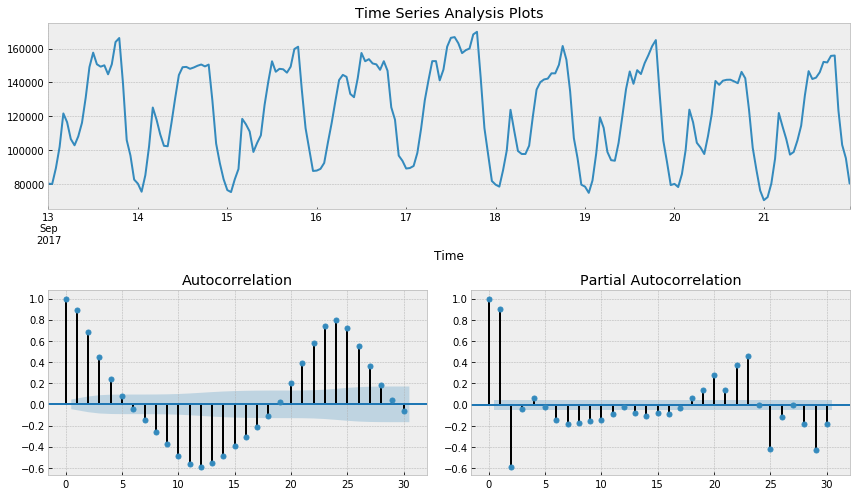

In [268]:
import statsmodels.tsa.api as smt
dt = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
plotly_df(dt, title = "Online users")

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        print(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(dt.Ads, lags=30)

Критерий Дики-Фуллера: p=0.047417


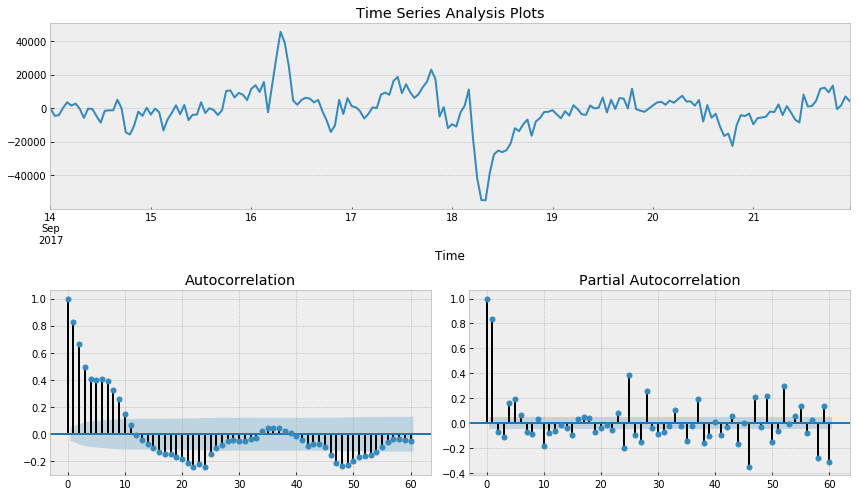

In [266]:
ads_diff = dt.Ads - dt.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)

Критерий Дики-Фуллера: p=0.000000


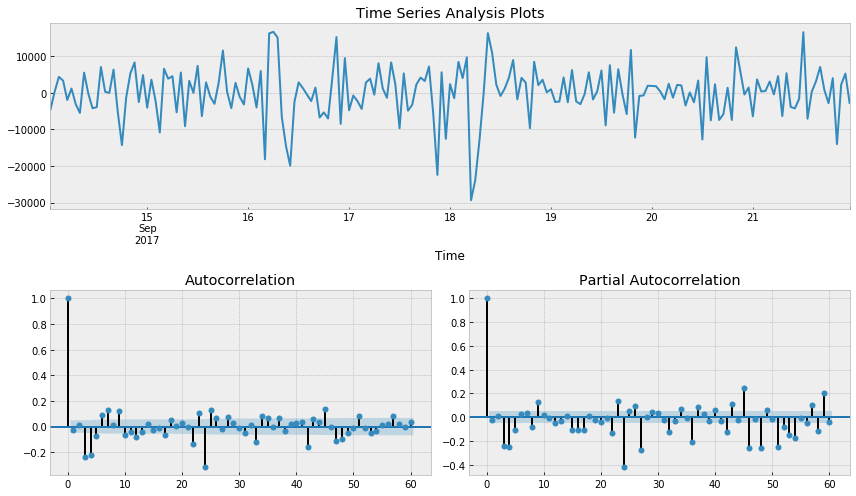

In [267]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)

In [ ]:
import xgboost as xgb

def XGB_forecast(data, lag_start=5, lag_end=20, test_size=0.15, scale=1.96):

    # исходные данные
    X_train, X_test, y_train, y_test = prepareData(dataset.Users, lag_start, lag_end, test_size)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'objective': 'reg:linear',
        'booster':'gblinear'
    }
    trees = 1000

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

    # можно построить кривые валидации
    #cv.plot(y=['test-mae-mean', 'train-mae-mean'])

    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = bst.predict(dtrain)
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_train)
    plt.plot(y_train)
    plt.axis('tight')
    plt.grid(True)

    # и на тестовом
    prediction_test = bst.predict(dtest)
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend()